<a href="https://colab.research.google.com/github/LK2705/AI-Projects-LAUNCHED/blob/main/sequential_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/Sales_April_2019.csv")

# Clean data
df.dropna(inplace=True)
df = df[df['Quantity Ordered'].apply(lambda x: str(x).isdigit())]

# Convert to proper datatypes
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)

# Create new 'Sales' column (target variable)
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

# Convert date column
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extract useful features
df['Month'] = df['Order Date'].dt.month
df['Hour'] = df['Order Date'].dt.hour

# Keep only numeric features for modeling
df = df[['Quantity Ordered', 'Price Each', 'Month', 'Hour', 'Sales']]
df.head()


/tmp/ipython-input-1762618700.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


,Quantity Ordered,Price Each,Month,Hour,Sales
0,2,11.95,4,8,23.90
2,1,99.99,4,22,99.99
3,1,600.00,4,14,600.00
4,1,11.99,4,14,11.99
5,1,11.99,4,9,11.99


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define input (X) and output (y)
X = df[['Quantity Ordered', 'Price Each', 'Month', 'Hour']]
y = df['Sales']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize Sequential model
model = Sequential()

# Add layers
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer
model.add(Dense(32, activation='relu'))                                   # Hidden layer
model.add(Dense(16, activation='relu'))                                   # Another hidden layer
model.add(Dense(1))                                                       # Output (Regression)

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# View model structure
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 115133.2422 - mae: 164.0483 - val_loss: 390.5972 - val_mae: 11.2589
Epoch 2/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1428.4648 - mae: 11.0752 - val_loss: 244.8444 - val_mae: 7.3782
Epoch 3/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 615.0117 - mae: 7.4175 - val_loss: 202.7519 - val_mae: 5.9306
Epoch 4/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 596.2786 - mae: 6.7679 - val_loss: 170.6232 - val_mae: 4.8486
Epoch 5/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 655.6797 - mae: 5.6965 - val_loss: 145.8185 - val_mae: 3.9931
Epoch 6/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 446.9561 - mae: 4.7562 - val_loss: 126.6151 - val_mae: 3.0955
Epoch 7/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 377.3679 - mae: 3.8997 - val_loss: 98.2330 - val_mae: 2.6328
Epoch 8/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 126.5984 - mae: 2.6801 - val_loss: 86.0579 - val_mae: 2.4508
Epoch 9/50
366/366

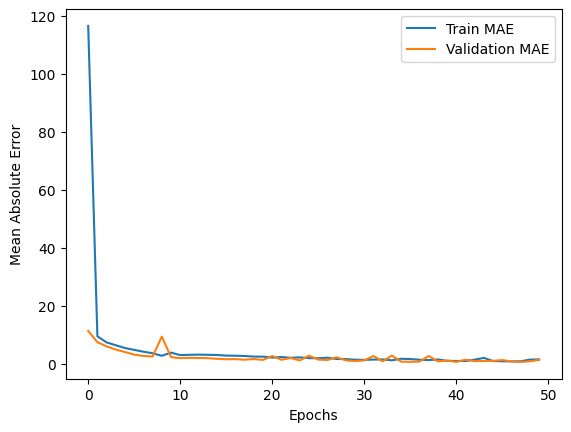

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()
